In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number

from src.function_helper import FunctionHelper, Quadratic
from src.custom_types import Line
from src.optimisation import UnconstrainedOptimizer


In [4]:
Q = np.array([[1, 2], [2, 4]])
p = np.array([1, -1])

test_func = Quadratic(Q=Q, p=p)

test_func_2 = test_func + 10
test_func_3 = test_func * 2

In [5]:
t_range = (-11, 10)
x0 = np.array([0, 0])
direction = np.array([1, 1])
n = 1000
offset = 1
order = 1

In [6]:
line = Line(
    x0=np.array([0, 0]),
    direction=np.array([1, 1])
)

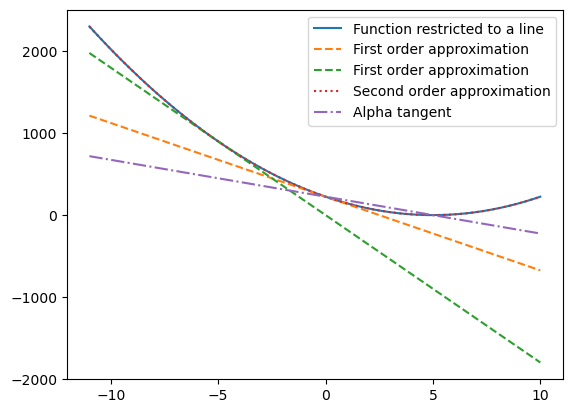

In [7]:
fig, ax = plt.subplots()

line = Line(
    x0=np.array([-5, -5]),
    direction=np.array([1, 1]),
    t_range=(-11, 10),
    n=1000
)

test_func.plot_line(line, ax=ax, label="Function restricted to a line")
test_func.plot_taylor_approximation(line, order=1, ax=ax, linestyle='--', label="First order approximation")
test_func.plot_taylor_approximation(line, order=1, offset=-5, ax=ax, linestyle='--', label="First order approximation")
test_func.plot_taylor_approximation(line, order=2, ax=ax, linestyle='dotted', label="Second order approximation")
test_func.plot_alpha_tangent(line, alpha=0.5, ax=ax, linestyle='-.', label="Alpha tangent")

In [15]:
# mini_hess = lambda x: x.reshape(-1, 1) @ x.reshape(1, -1)
# mu = 1e3
# # f = lambda x: np.nan_to_num(c.T @ x - np.sum(np.log(b - a @ x)), nan=np.inf)
# # g = lambda x: c - a.T @ (1 /(b - a @ x))
# # h = lambda x: -a.T @ np.diag(1 /(b - a @ x)**2) @ a
# f = lambda x: (np.log(b - a.T @ x) - np.log(b + a.T @ x))
# g = lambda x: (a / (b - a.T @ x)) - mu*(a / (b + a.T @ x))
# h = lambda x: mu*(mini_hess(a) / (b - a.T @ x)**2) + mu*(mini_hess(a) / (b + a.T @ x)**2)

In [260]:
N = 100
Q = nprd.uniform(-1, 1, size=(N, N))
p = nprd.uniform(-1, 1, size=(N))

In [261]:
ex_f = Quadratic(Q.T @ Q/10, p)
x0 = np.zeros(N)

In [262]:
pb = UnconstrainedOptimizer(ex_f, x0, method="newton")
pb.update_dir()

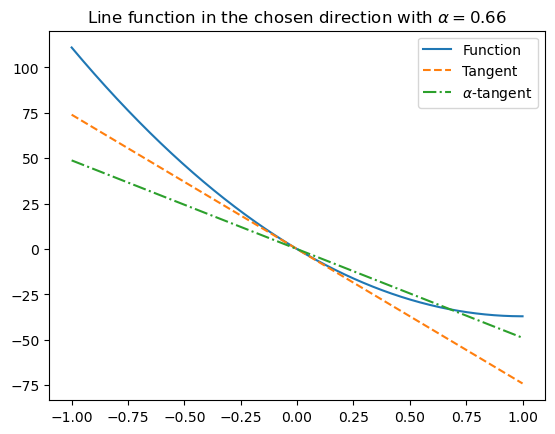

In [263]:
pb.plot_line(0.66, (-1, 1))

In [264]:
pb.optimise(1e-8, alpha=0.66, beta=0.66, verbose=True)

Step 1:
	 Criterion = 4.28e+00
	 y_1 = -33
	 y_0 - y_1 = 33
Step 2:
	 Criterion = 4.94e-01
	 y_2 = -36
	 y_1 - y_2 = 3.8
Step 3:
	 Criterion = 5.71e-02
	 y_3 = -37
	 y_2 - y_3 = 0.44
Step 4:
	 Criterion = 6.61e-03
	 y_4 = -37
	 y_3 - y_4 = 0.051
Step 5:
	 Criterion = 7.64e-04
	 y_5 = -37
	 y_4 - y_5 = 0.0058
Step 6:
	 Criterion = 8.83e-05
	 y_6 = -37
	 y_5 - y_6 = 0.00068
Step 7:
	 Criterion = 1.02e-05
	 y_7 = -37
	 y_6 - y_7 = 7.8e-05
Step 8:
	 Criterion = 1.18e-06
	 y_8 = -37
	 y_7 - y_8 = 9e-06
Step 9:
	 Criterion = 1.36e-07
	 y_9 = -37
	 y_8 - y_9 = 1e-06
Step 10:
	 Criterion = 1.58e-08
	 y_10 = -37
	 y_9 - y_10 = 1.2e-07
Step 11:
	 Criterion = 1.82e-09
	 y_11 = -37
	 y_10 - y_11 = 1.4e-08
Last step 11:
	 Criterion = 1.82e-09
	 y_11 = -37
	 y_10 - y_11 = 1.4e-08


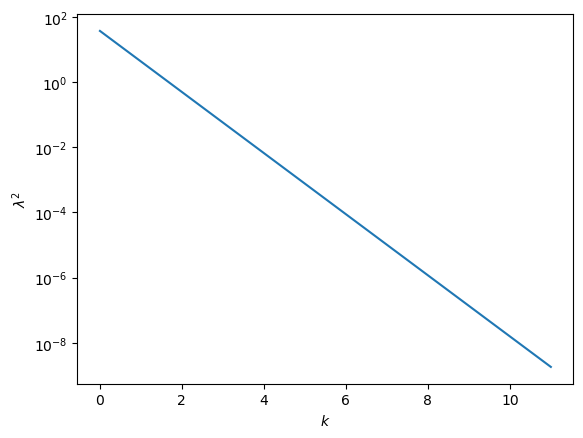

In [265]:
pb.plot_criterion()

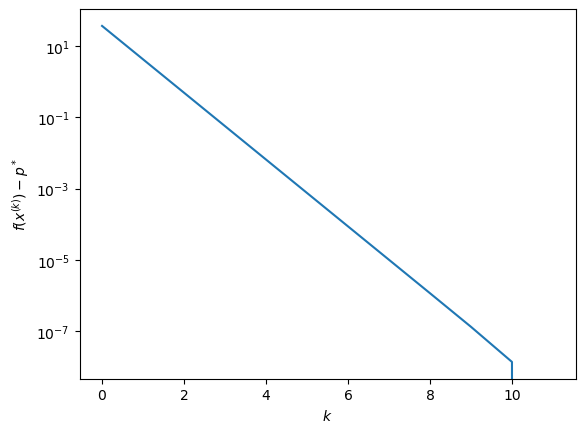

In [266]:
pb.plot_gap()

\begin{equation}
\min_{x \in R^n} c^T x + \sum_{i = 1}^I \log(b_i - a_i^T x)
\end{equation}
with $N=100$ and $I=500$

In [141]:
from src.function_helper import LinearFunction, LogAffineFunction
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [346]:
N = 5
I = 2

In [351]:
c = nprd.uniform(-1, 1, size=(N, N))
b = nprd.uniform(1, 5, size=(I,))
a = nprd.uniform(-1, 1, size=(I, N))
Q = nprd.uniform(-1, 1, size=(N, N))
p = nprd.uniform(-1, 1, size=(N))
x = np.zeros(N)

In [352]:
log_aff_0 = LogAffineFunction(a[0, :], b[0])
log_aff_1 = LogAffineFunction(a[1, :], b[1])
lin_f = LinearFunction(c)
quad_f = Quadratic(Q.T @ Q/100, p)
objective = quad_f + log_aff_0 + log_aff_1

In [358]:
objective(x)

-2.060211354909619

In [354]:
pbl = UnconstrainedOptimizer(objective, x, method="newton", max_iter=100)

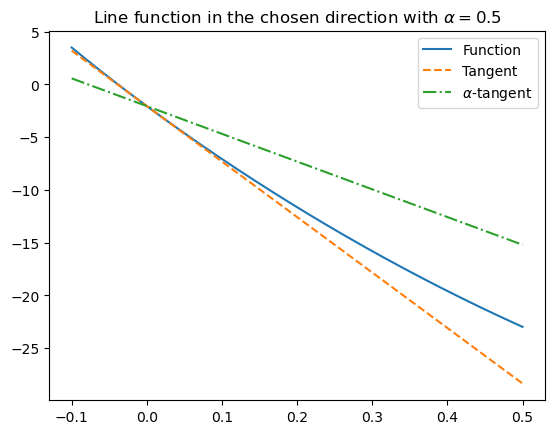

In [355]:
pbl.plot_line(0.5, t_range=(-0.1, 0.5))

In [357]:
error, alpha, beta = 1e-8, 0.4, 0.5
pbl.optimise(error, alpha, beta, verbose=True)

Step 1:
	 Criterion = 5.58e+01
	 y_1 = -34
	 y_0 - y_1 = 32
Step 2:
	 Criterion = 9.07e+00
	 y_2 = -1.1e+02
	 y_1 - y_2 = 72
Step 3:
	 Criterion = 3.52e-04
	 y_3 = -1.2e+02
	 y_2 - y_3 = 9.1
Step 4:
	 Criterion = 1.34e-07
	 y_4 = -1.2e+02
	 y_3 - y_4 = 0.00036
Step 5:
	 Criterion = 3.55e-14
	 y_5 = -1.2e+02
	 y_4 - y_5 = 1.3e-07
Last step 5:
	 Criterion = 3.55e-14
	 y_5 = -1.2e+02
	 y_4 - y_5 = 1.3e-07


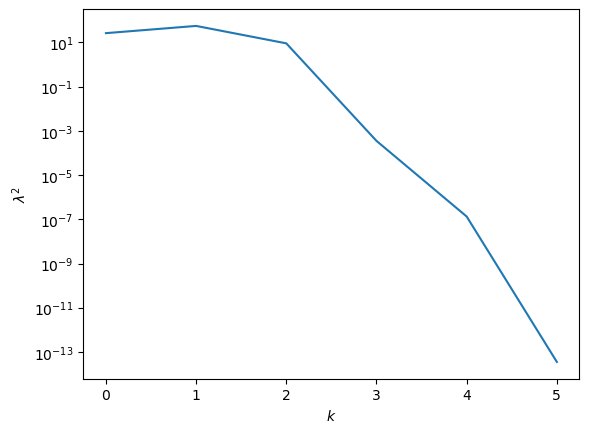

In [359]:
pbl.plot_criterion()

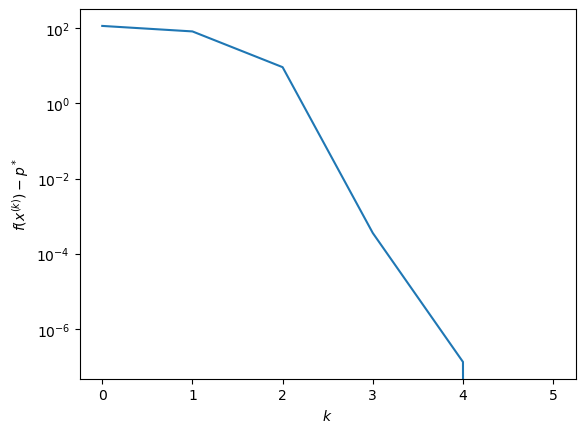

In [360]:
pbl.plot_gap()

In [368]:
x, eps = pbl.x, 1e-1*nprd.randn(N)
objective(x), objective(x+eps)
quad_f(x), quad_f(x+eps)

(-110.52603778525015, -110.42516565489643)

In [225]:
objective(np.array([0, 0.9, 0]))

6.656674943938732

In [226]:
objective(pbl.x)

-6623.134871024689

In [220]:
c, ai, bi

(array([4, 7, 1]), array([3, 7, 6]), 7)

In [216]:
pbl.x

array([-400.64123759, -701.49622104, -101.28247517])

In [65]:
log_barrier_func = LinearFunction(c)
for i in range(I):
    log_barrier_func = log_barrier_func + LogAffineFunction(a[i, :], b[i])

In [66]:
log_barrier_pb = UnconstrainedOptimizer(log_barrier_func, x, method="newton", max_iter=100)

In [76]:
log_barrier_pb.update_dir()

In [96]:
lf = log_barrier_pb.func.line_func(log_barrier_pb.line)
at = log_barrier_pb.alpha_tangent(0.5)

In [114]:
t = 0.000000000005
lf(t), at(t)

(-1615.4420713520715, -1615.442071346218)

In [91]:
lf(0.1)

-1839.1643532972184

In [84]:
lf(ts)

ValueError: operands could not be broadcast together with shapes (1000,) (100,) 

In [81]:
lf(0)

-1615.4420713403642

KeyboardInterrupt: 

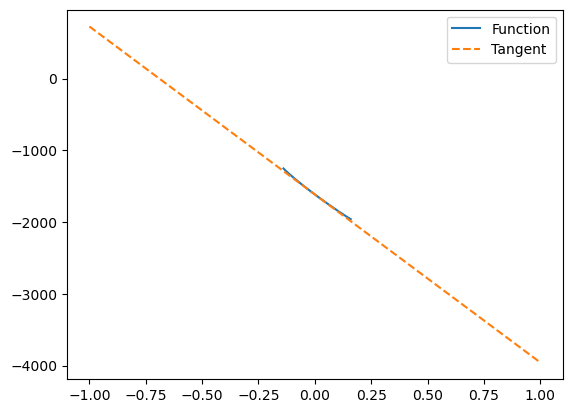

In [75]:
log_barrier_pb.plot_line(0.66)